In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

## Read Data

In [2]:
data = pd.read_excel('Company_Data2015.xlsx')

In [3]:
data.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [4]:
data.shape

(3586, 67)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,3586.0,16065.388734,19776.817379,4.00,3029.2500,6077.500,24269.5000,72493.00
Networth Next Year,3586.0,725.045251,4769.681004,-8021.60,3.9850,19.015,123.8025,111729.10
Equity Paid Up,3586.0,62.966584,778.761744,0.00,3.7500,8.290,19.5175,42263.46
Networth,3586.0,649.746299,4091.988792,-7027.48,3.8925,18.580,117.2975,81657.35
Capital Employed,3586.0,2799.611054,26975.135385,-1824.75,7.6025,39.090,226.6050,714001.25
...,...,...,...,...,...,...,...,...
Debtors Velocity (Days),3586.0,603.894032,10636.759580,0.00,8.0000,49.000,106.0000,514721.00
Creditors Velocity (Days),3586.0,2057.854992,54169.479197,0.00,8.0000,39.000,89.0000,2034145.00
Inventory Velocity (Days),3483.0,79.644559,137.847792,-199.00,0.0000,35.000,96.0000,996.00
Value of Output/Total Assets,3586.0,0.819757,1.201400,-0.33,0.0700,0.480,1.1600,17.63


In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum().sum()

118

In [9]:
data.drop(['Co_Code','Co_Name'],axis=1,inplace=True)

In [10]:
data.head()

,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [11]:
data.shape

(3586, 65)

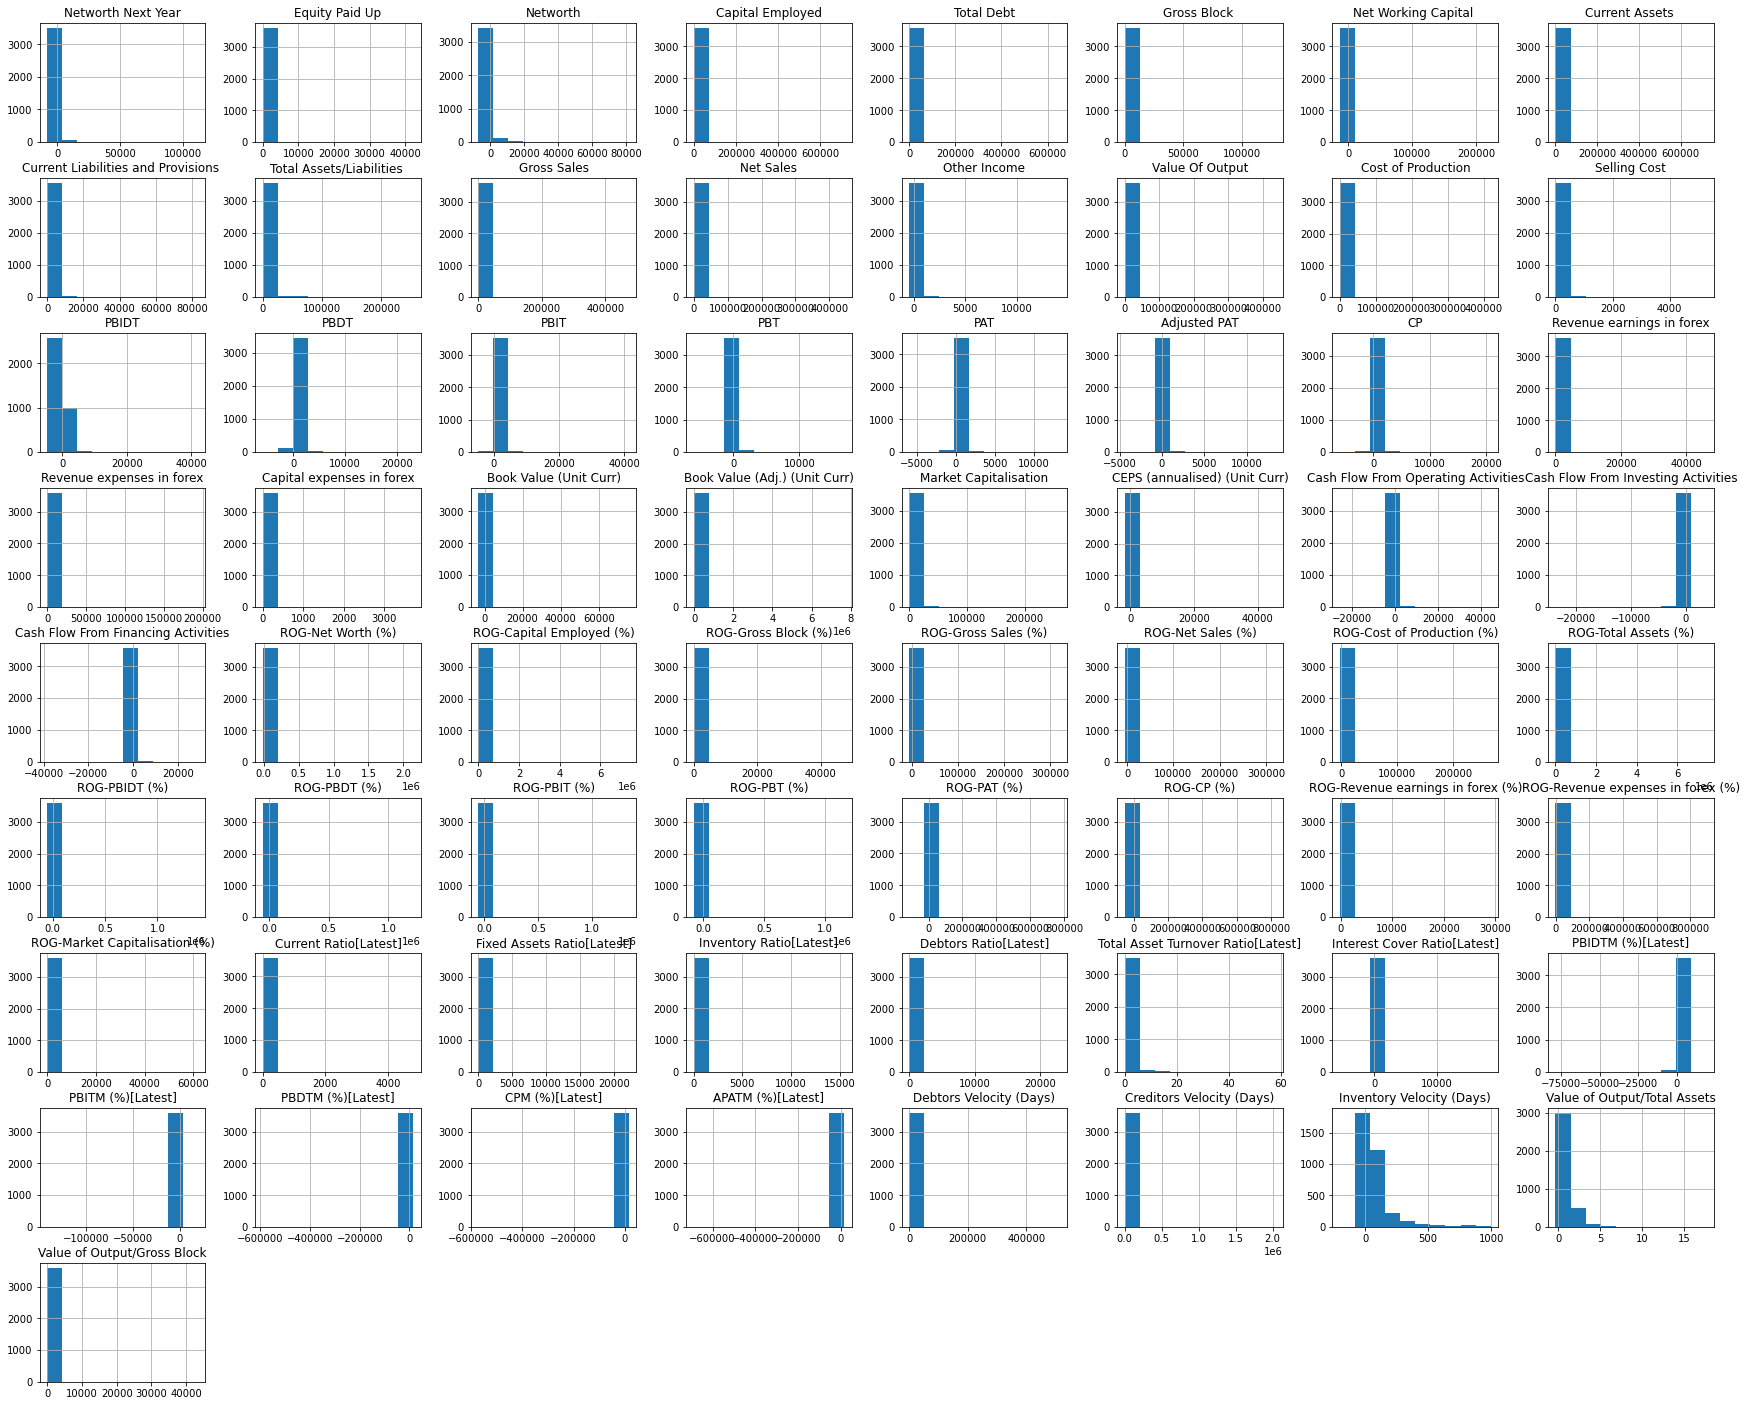

In [12]:
data.hist(figsize=(30,25));

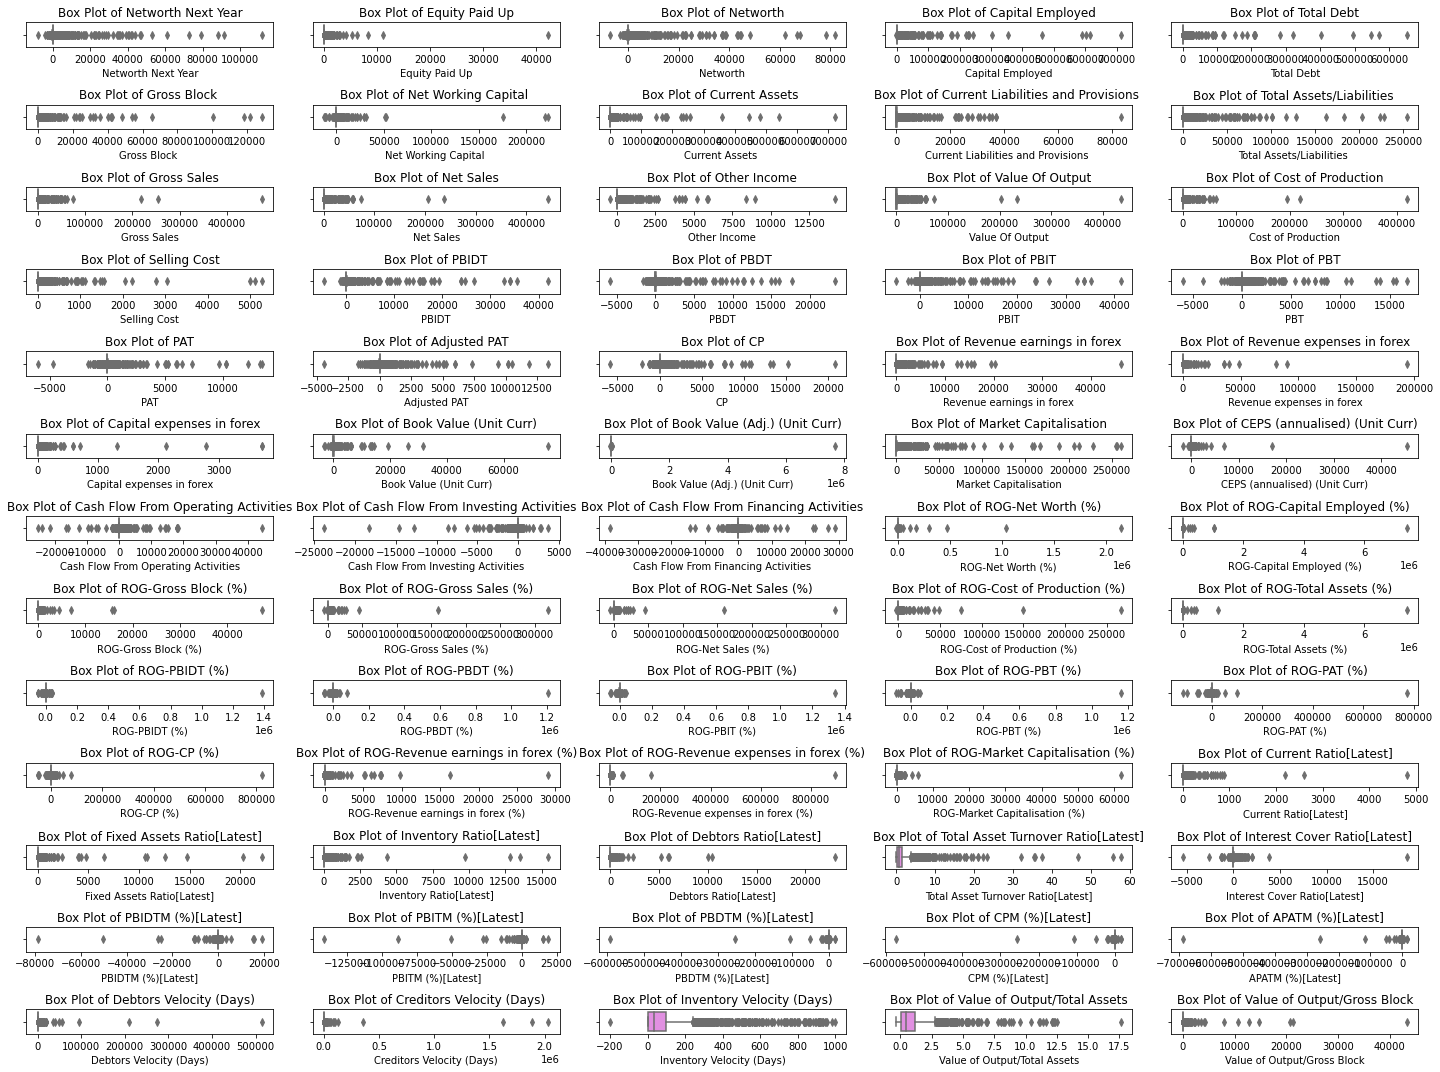

In [13]:
plt.figure(figsize = (20,15))
feature_list = data.describe().columns
for i in range(len(feature_list)):
    plt.subplot(13,5,i+1)
    sns.boxplot(x=data[feature_list[i]], color='violet',orient='h')
    plt.title('Box Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [14]:
# Remove outlier
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [15]:
for column in data.columns:
    lr,ur=remove_outlier(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])

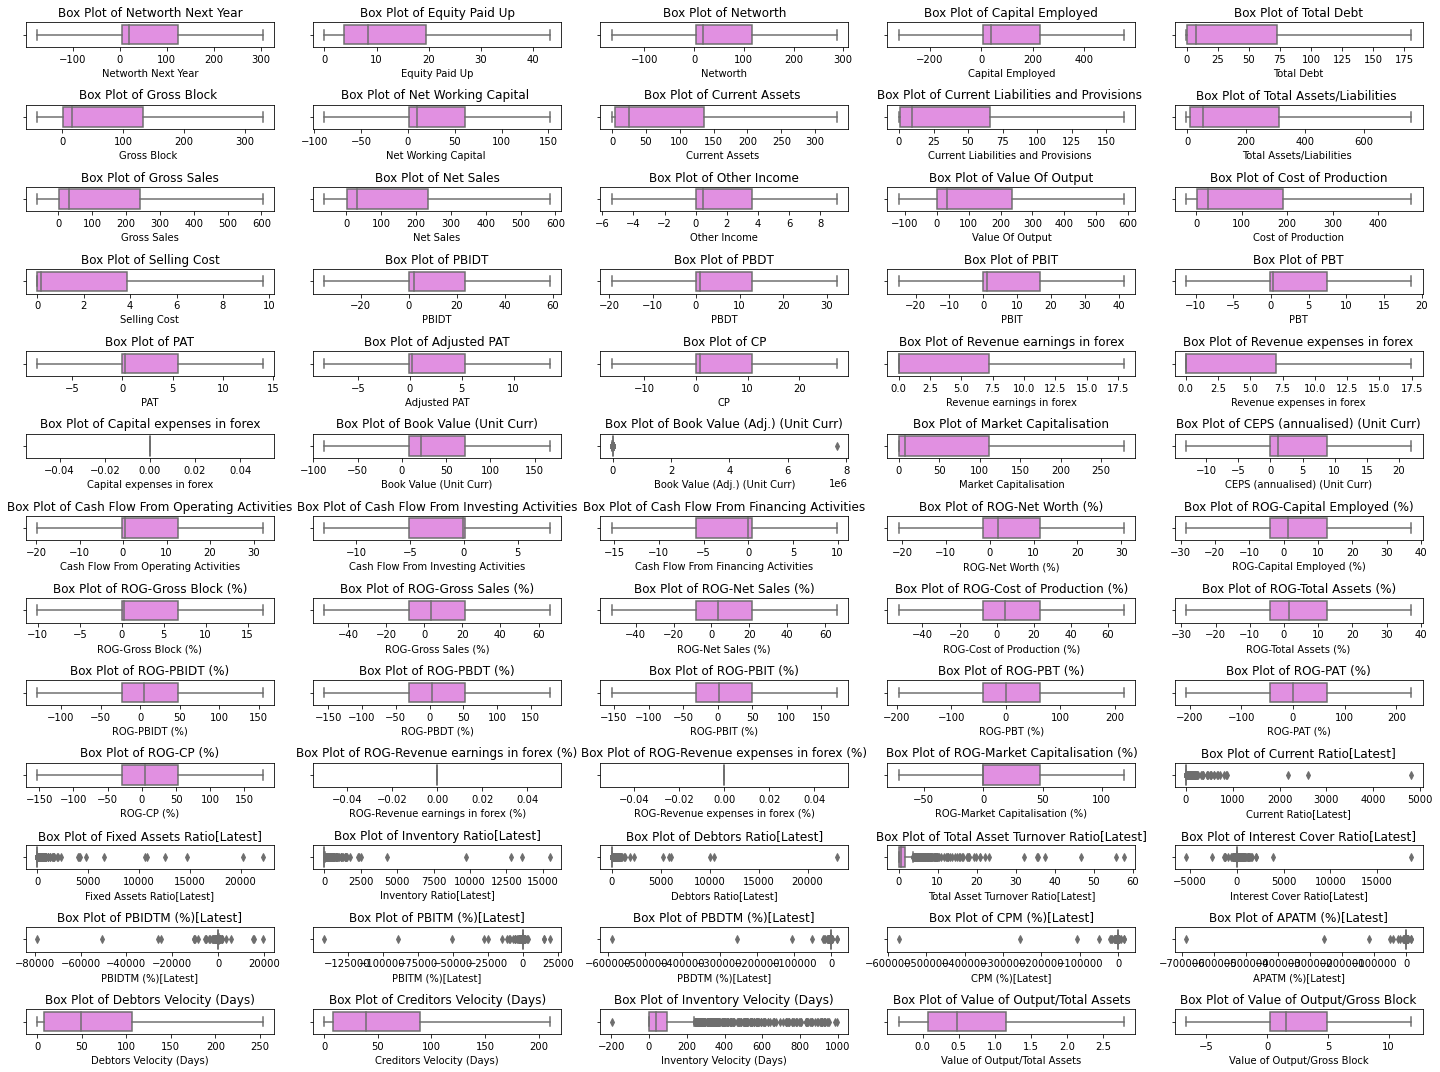

In [16]:
plt.figure(figsize = (20,15))
feature_list = data.describe().columns
for i in range(len(feature_list)):
    plt.subplot(13,5,i+1)
    sns.boxplot(x=data[feature_list[i]], color='violet',orient='h')
    plt.title('Box Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [17]:
print('Positive',data[data['Networth Next Year']>0].shape[0])
print('Negative',data[data['Networth Next Year']<=0].shape[0])

Positive 3198
Negative 388


In [18]:
data['Default'] = np.where(data['Networth Next Year']>0,0,1)

In [19]:
data['Default'].value_counts()

0    3198
1     388
Name: Default, dtype: int64

In [20]:
predictors = data.drop('Default', axis = 1)
response = data['Default']

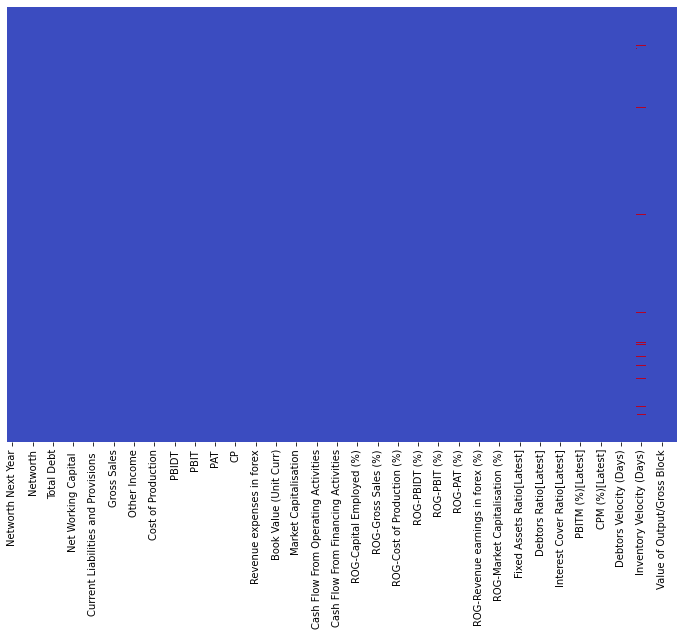

In [21]:
plt.figure(figsize = (12,8))
sns.heatmap(data.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [23]:
data1 = pd.concat([scaled_predictors, response], axis = 1)

In [24]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
data1_imputed = pd.DataFrame(imputer.fit_transform(data1), columns = data1.columns)

In [25]:
data1_imputed.isnull().sum().sum()

0

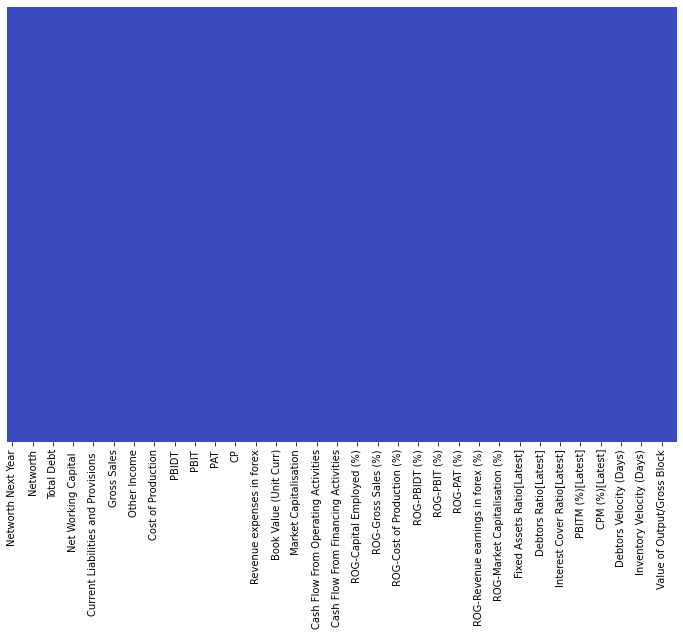

In [26]:
plt.figure(figsize = (12,8))
sns.heatmap(data1_imputed.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

## Univariate Analysis

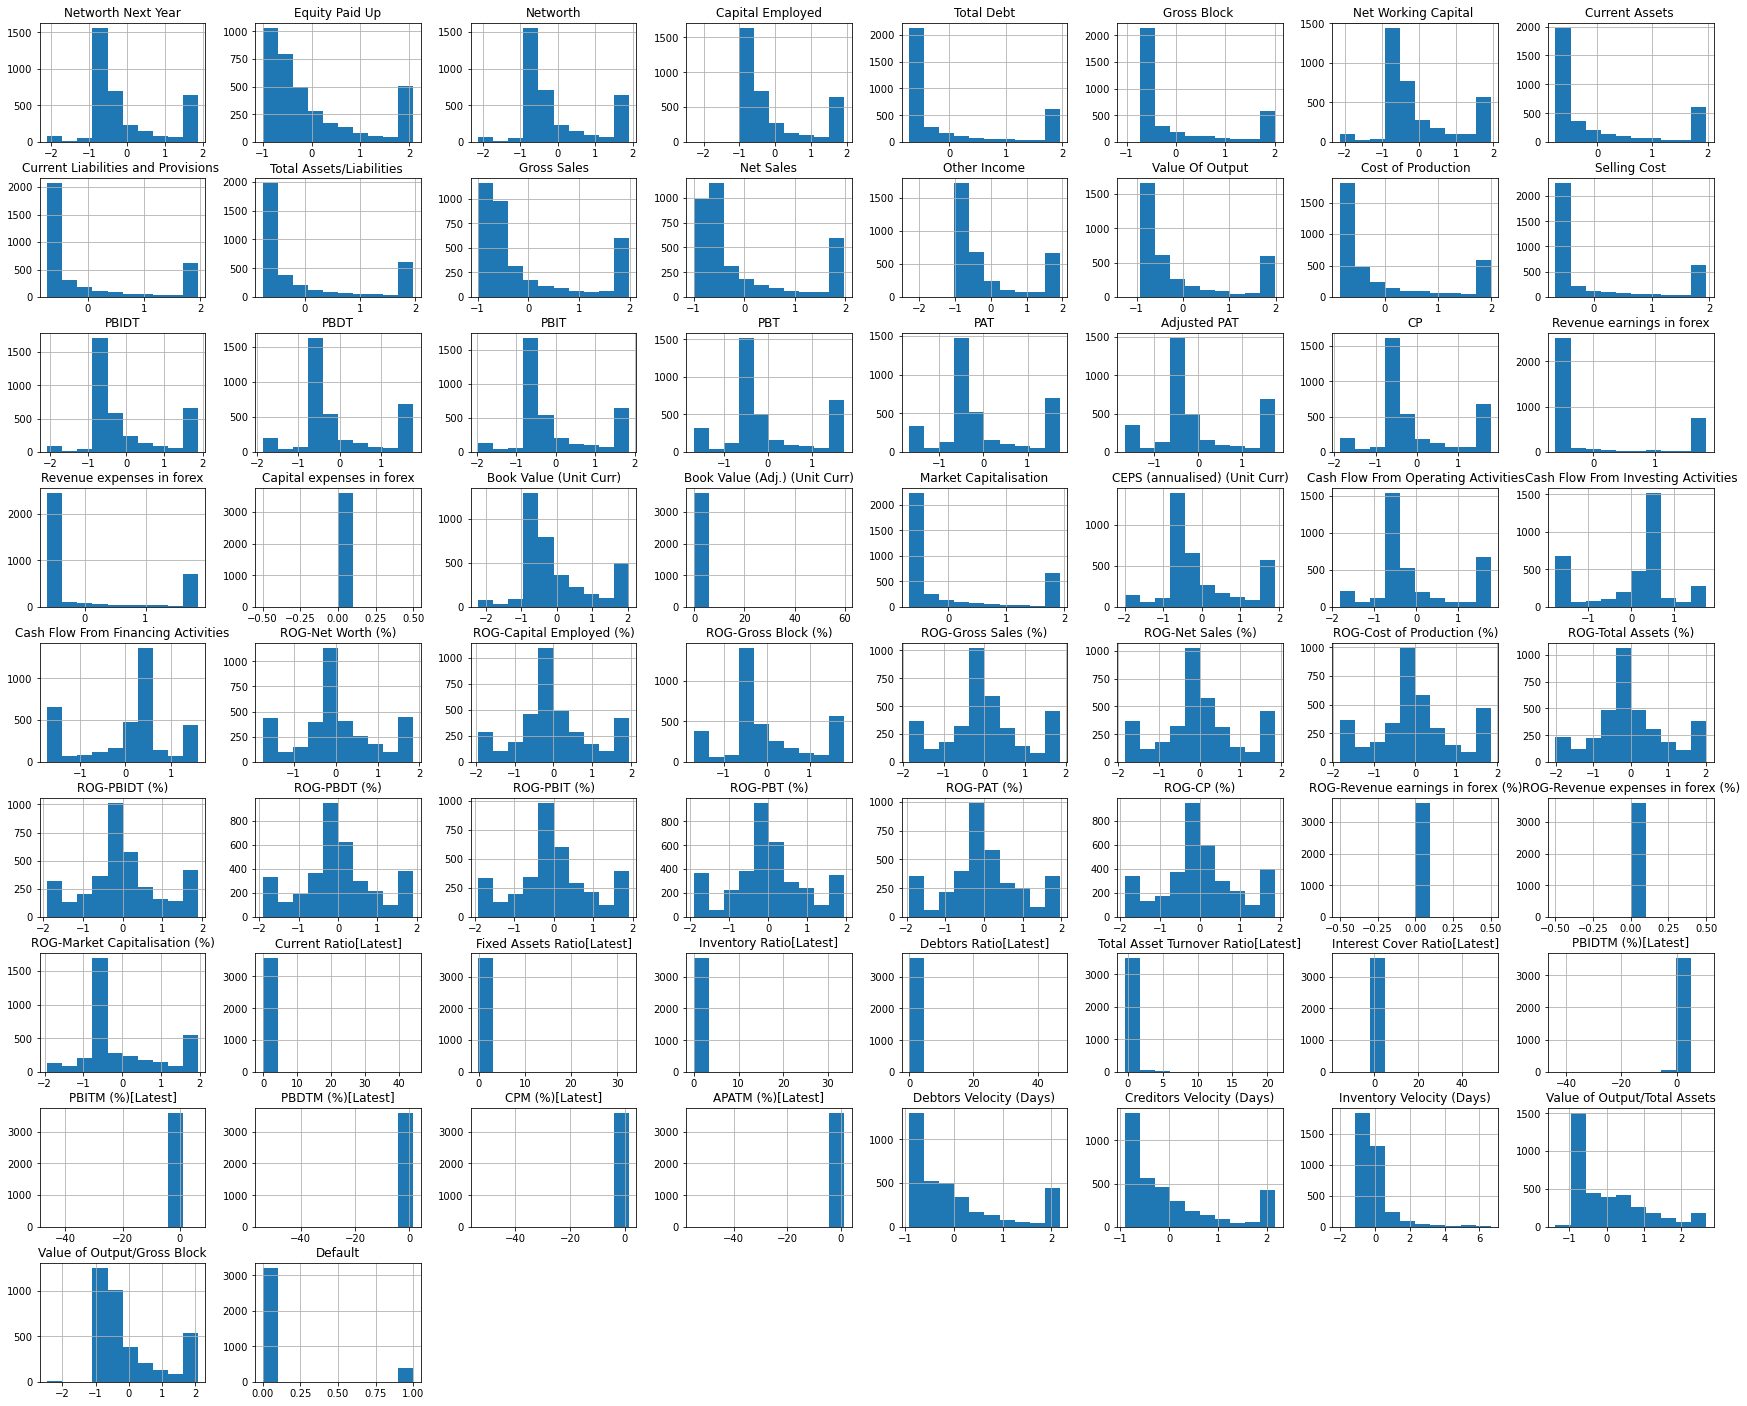

In [27]:
data1_imputed.hist(figsize=(30,25));

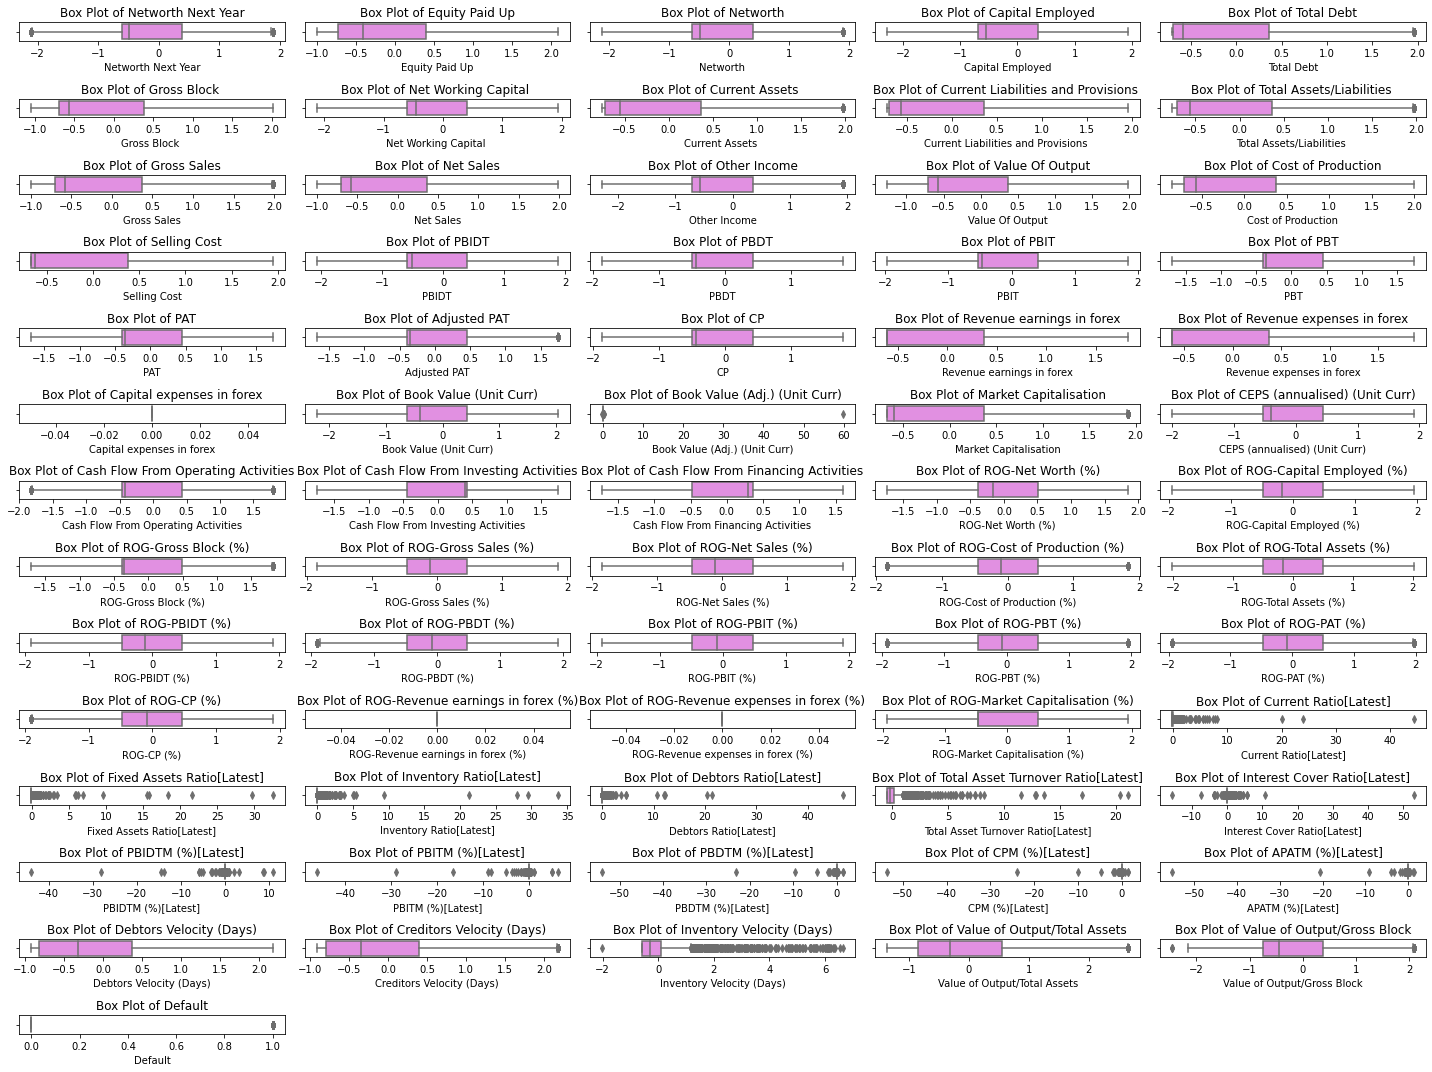

In [28]:
plt.figure(figsize = (20,15))
feature_list = data1_imputed.describe().columns
for i in range(len(feature_list)):
    plt.subplot(14,5,i+1)
    sns.boxplot(x=data1_imputed[feature_list[i]], color='violet',orient='h')
    plt.title('Box Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

## Bivariate Analysis

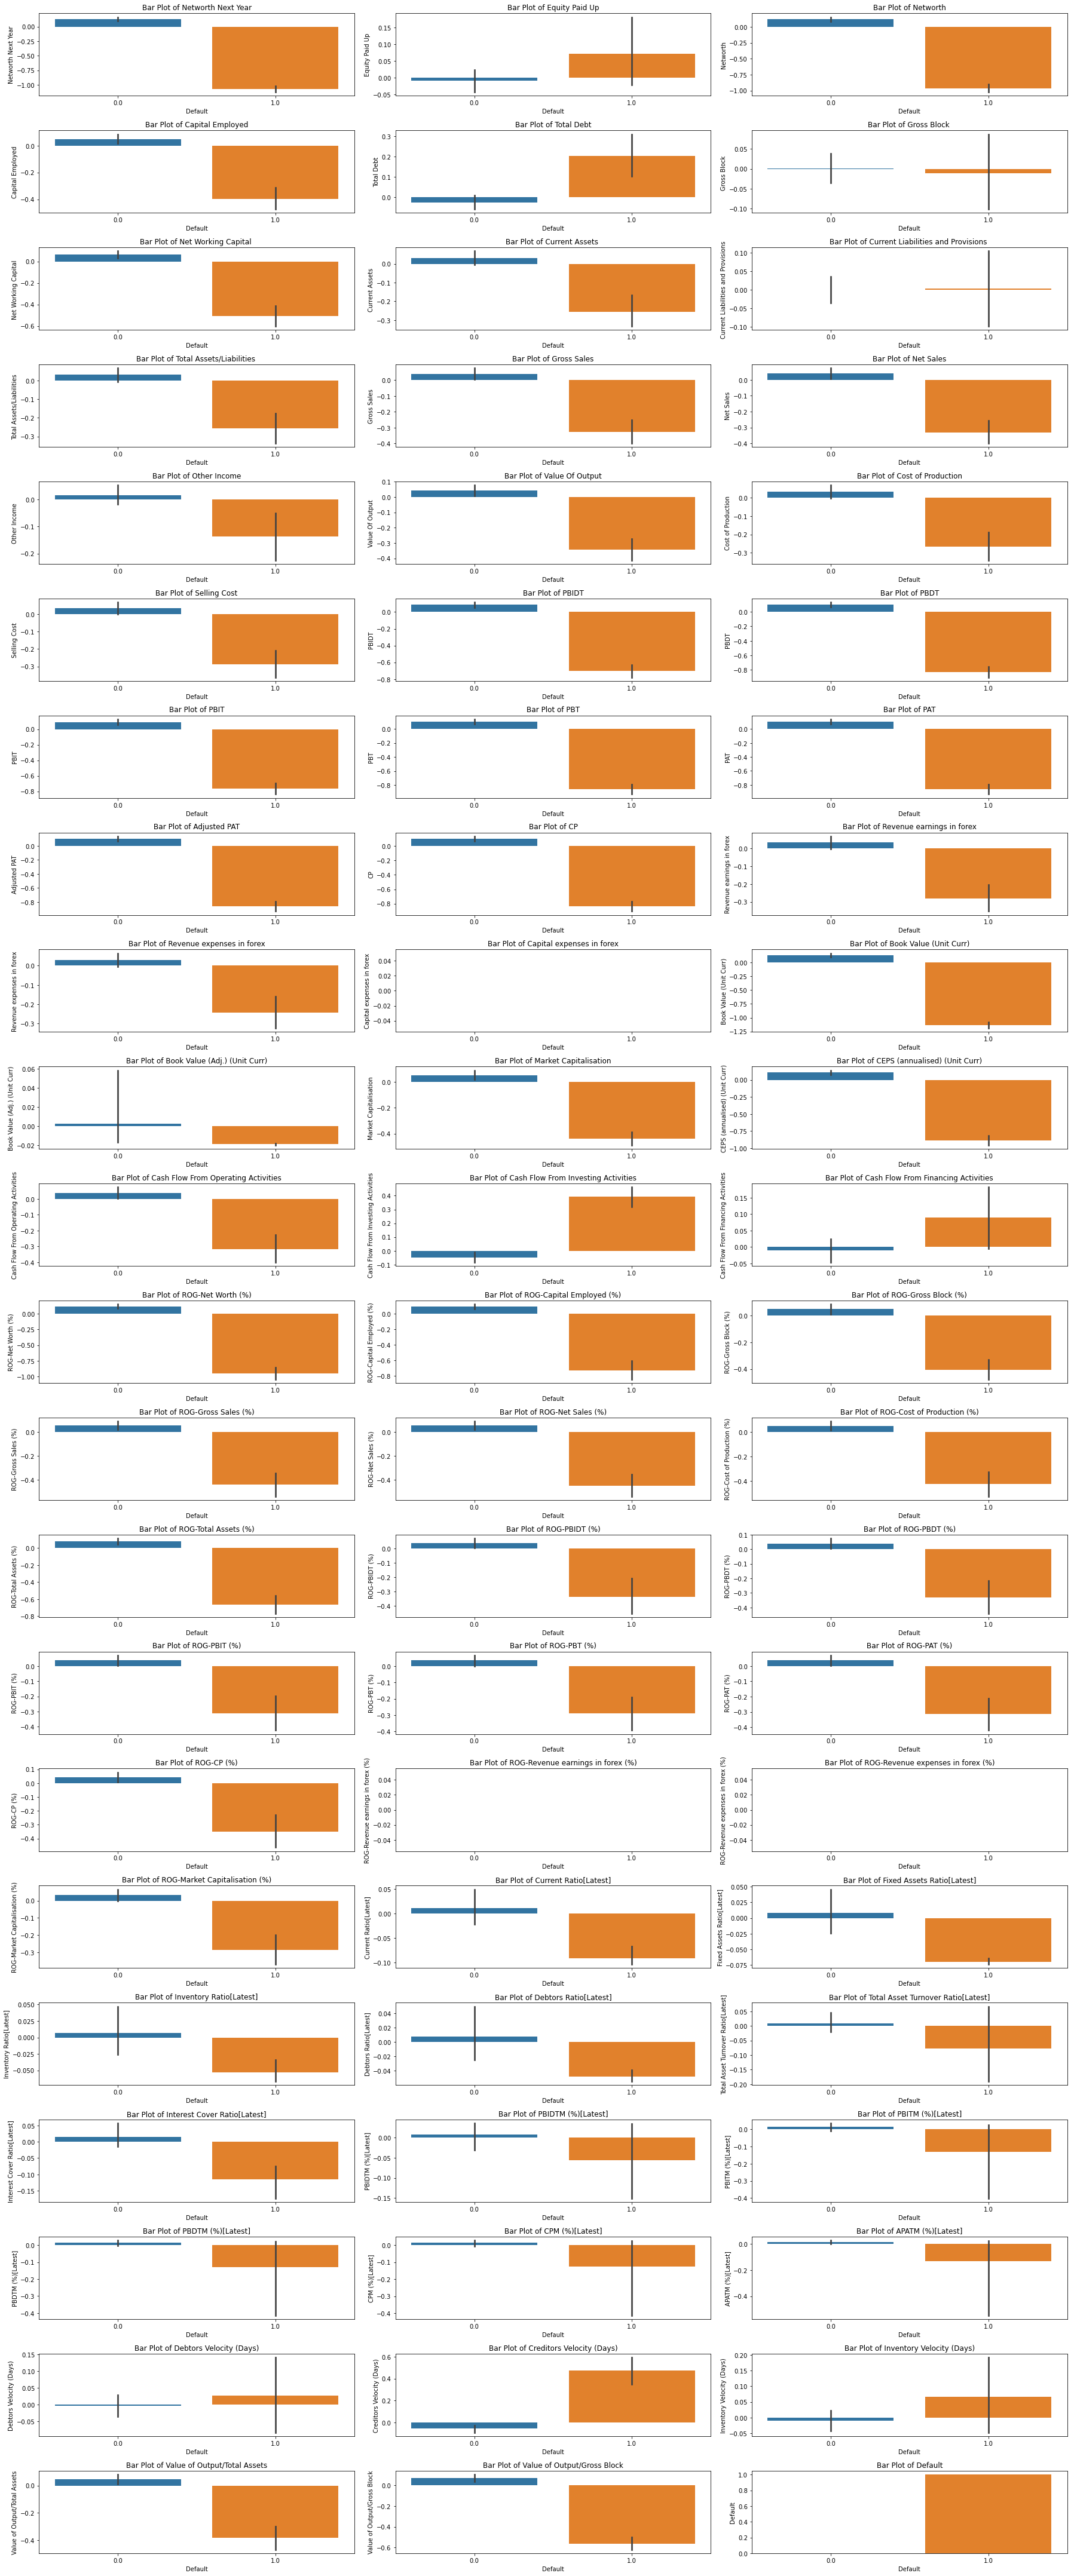

In [29]:
plt.figure(figsize = (25,60))
feature_list = data1_imputed.describe().columns
for i in range(len(feature_list)):
    plt.subplot(22,3,i+1)
    sns.barplot(x=data1_imputed['Default'],y=data1_imputed[feature_list[i]])
    plt.title('Bar Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

## Multivariate

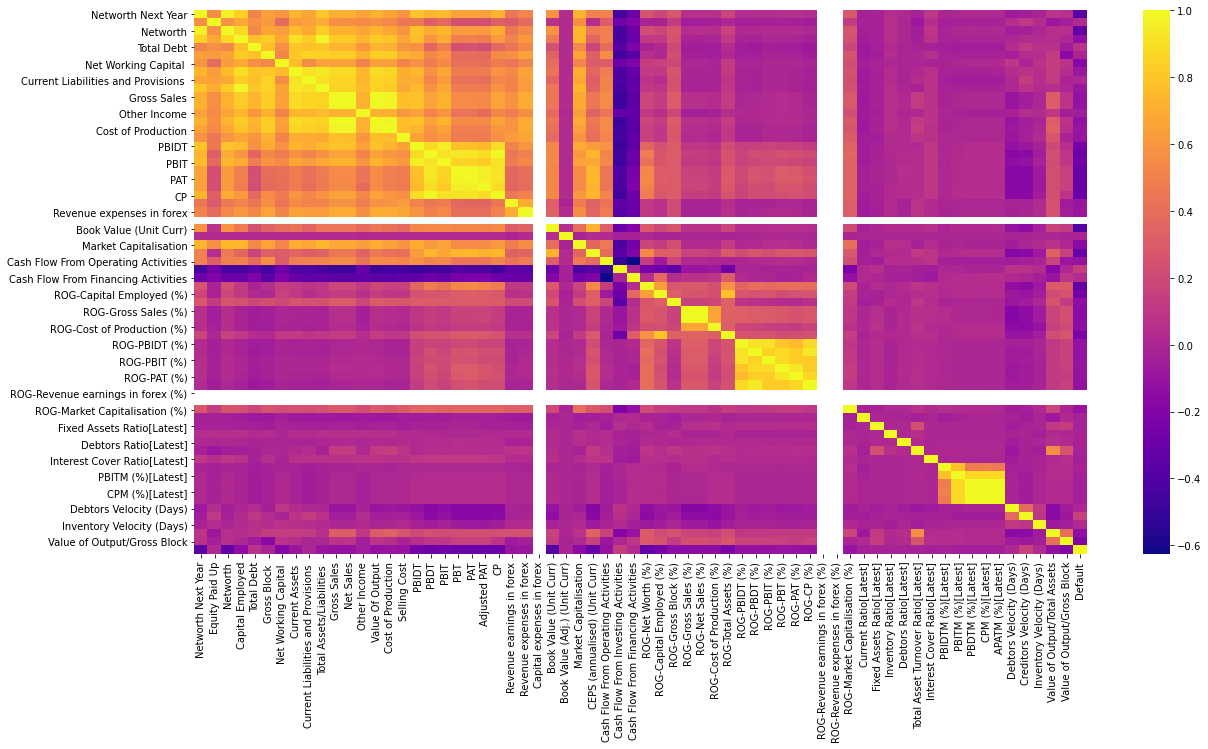

In [30]:
plt.figure(figsize = (20,10))
g = data1_imputed.corr()
sns.heatmap(g, cmap = 'plasma');

In [31]:
g = data1_imputed.corr()

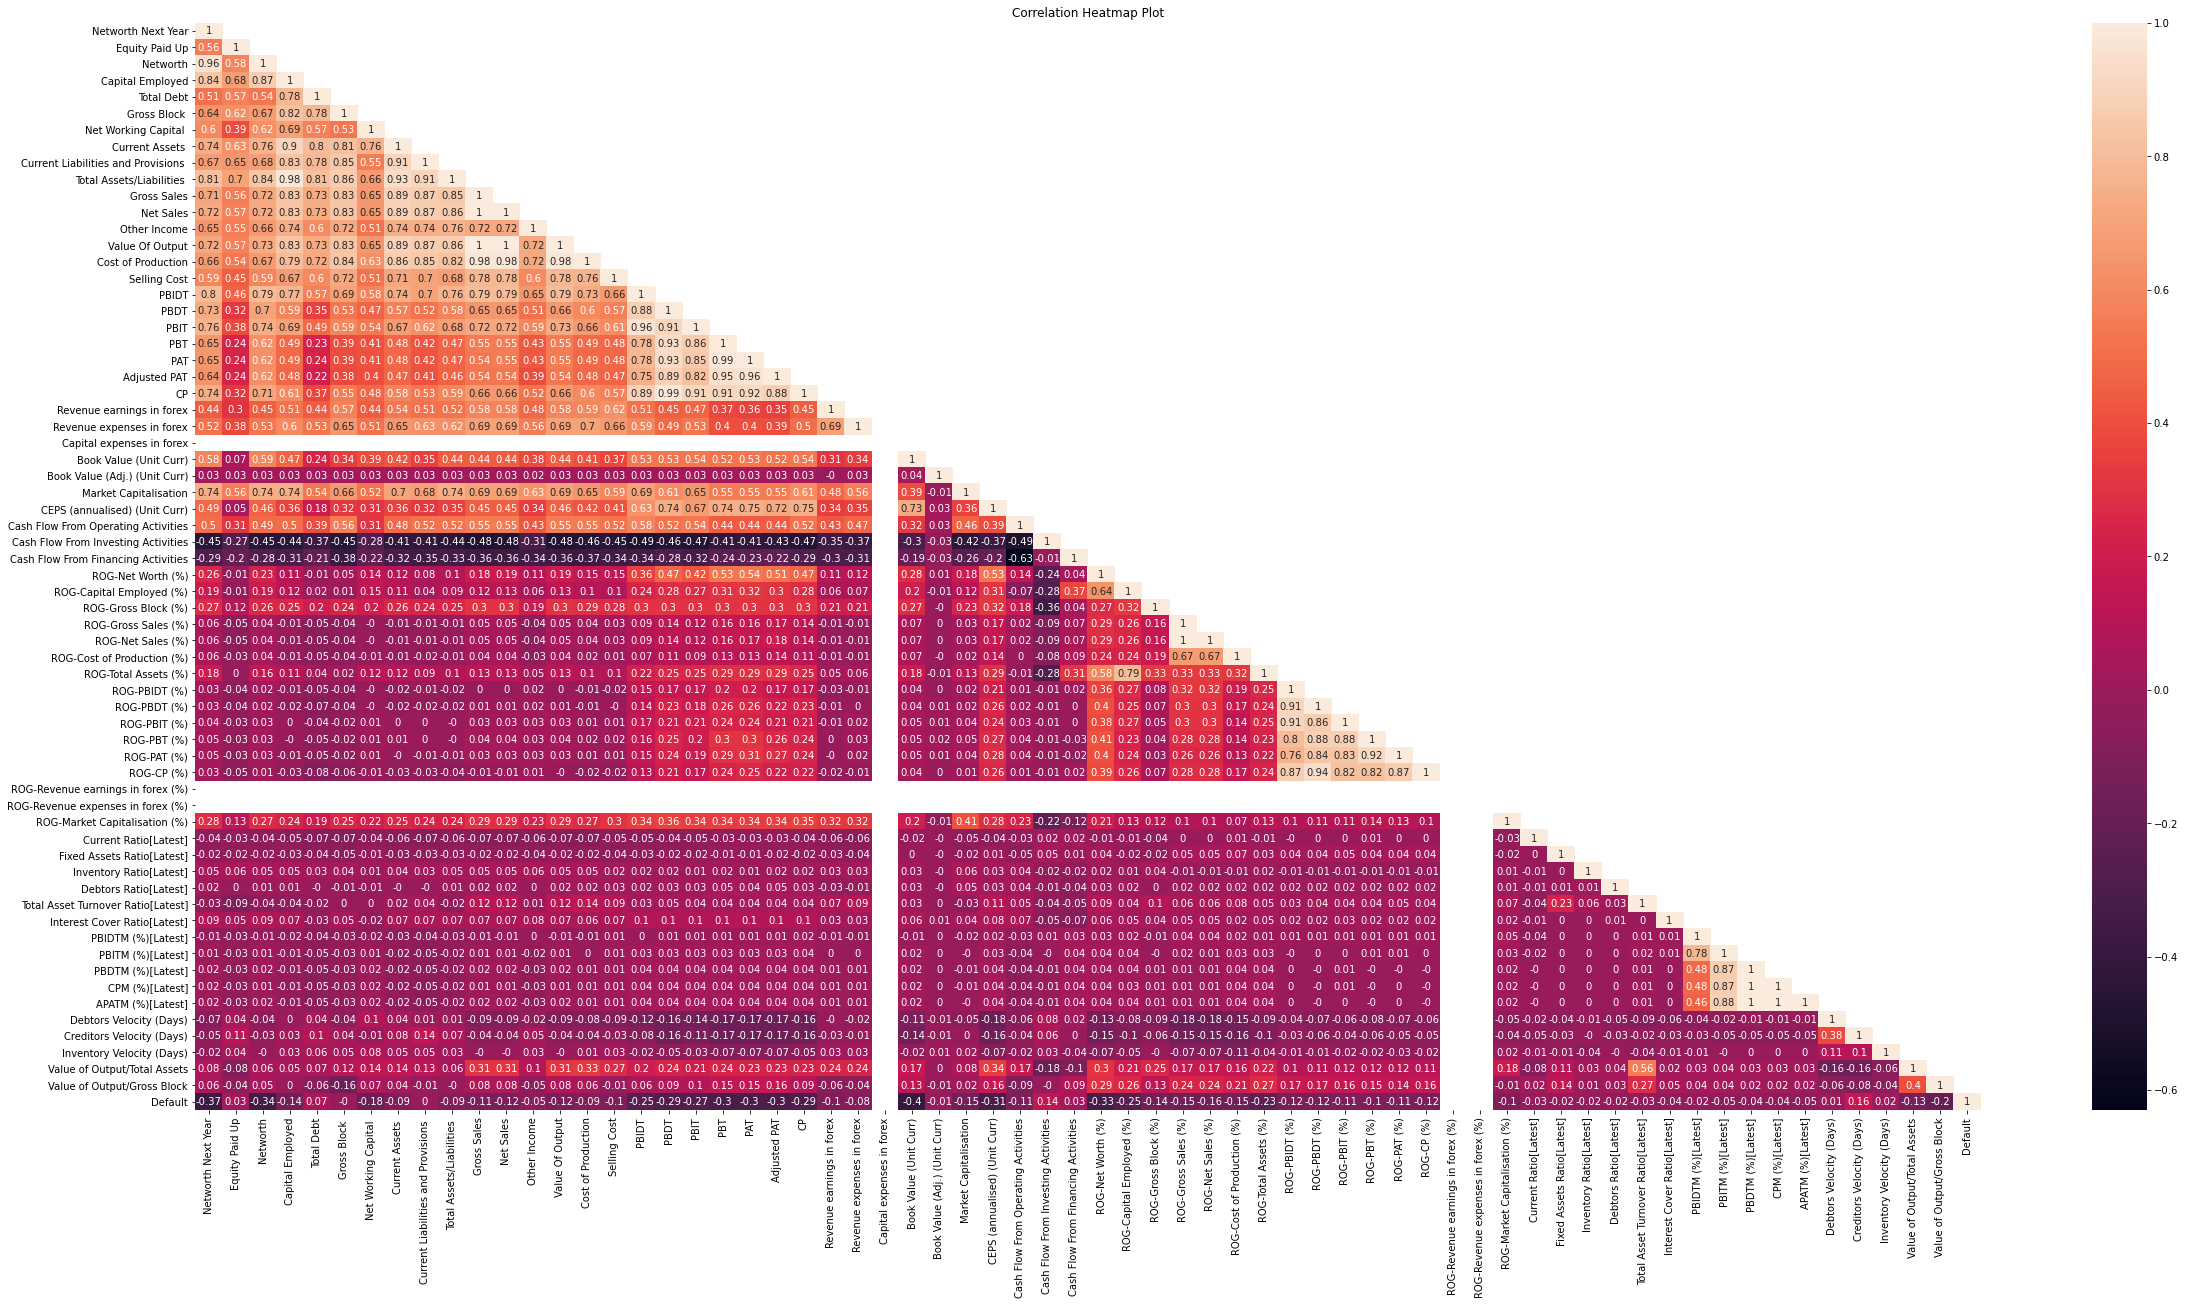

In [32]:
plt.figure(figsize=(40,20))
sns.heatmap(round(g,2), annot=True,mask=np.triu(g,+1));
plt.title('Correlation Heatmap Plot')
plt.show()

## Train Test Split

In [33]:
X = data1_imputed.drop('Default', axis = 1)
y = data1_imputed['Default']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [36]:
print('The training set for the independent variables:',X_train.shape)
print('The training set for the dependent variable:',y_train.shape)
print('The test set for the independent variables:',X_test.shape)
print('The test set for the dependent variable:',y_test.shape)

The training set for the independent variables: (2402, 65)
The training set for the dependent variable: (2402,)
The test set for the independent variables: (1184, 65)
The test set for the dependent variable: (1184,)


## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
# Fit the Logistic Regression model
model_log = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model_log.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    4.5s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [39]:
ytrain_predict_log = model_log.predict(X_train)
ytest_predict_log = model_log.predict(X_test)

In [40]:
ytest_predict_prob_log=model_log.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_log).head()

,0,1
0,1.0,0.000000e+00
1,1.0,0.000000e+00
2,1.0,1.408042e-120
3,0.0,1.000000e+00
4,1.0,0.000000e+00


In [41]:
# Accuracy - Training Data
model_log.score(X_train, y_train)

1.0

In [42]:
# Accuracy - Testing Data
model_log.score(X_test, y_test)

0.9847972972972973

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [45]:
model_log = LogisticRegression(max_iter=10000,n_jobs=2)

In [46]:
grid_search_log = GridSearchCV(estimator = model_log, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [47]:
grid_search_log.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [48]:
print(grid_search_log.best_params_,'\n')
print(grid_search_log.best_estimator_)

{'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none')


In [49]:
best_model_log = grid_search_log.best_estimator_

In [50]:
# Prediction on the training set

ytrain_predict_log = best_model_log.predict(X_train)
ytest_predict_log = best_model_log.predict(X_test)

In [51]:
## Getting the probabilities on the test set

ytest_predict_prob_log=best_model_log.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_log).head()

,0,1
0,1.0,0.000000e+00
1,1.0,0.000000e+00
2,1.0,9.213858e-245
3,0.0,1.000000e+00
4,1.0,0.000000e+00


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2157
         1.0       1.00      1.00      1.00       245

    accuracy                           1.00      2402
   macro avg       1.00      1.00      1.00      2402
weighted avg       1.00      1.00      1.00      2402
 



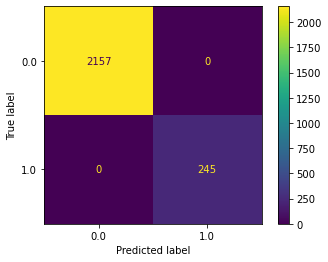

In [52]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model_log,X_train,y_train)
print(classification_report(y_train, ytrain_predict_log),'\n');

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1041
         1.0       0.94      0.91      0.93       143

    accuracy                           0.98      1184
   macro avg       0.96      0.95      0.96      1184
weighted avg       0.98      0.98      0.98      1184
 



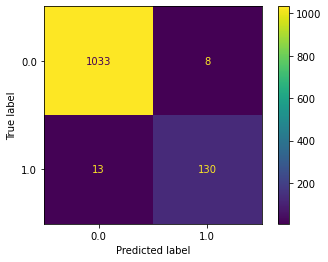

In [53]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model_log,X_test,y_test)
print(classification_report(y_test, ytest_predict_log),'\n');

Training AUC: 1.000


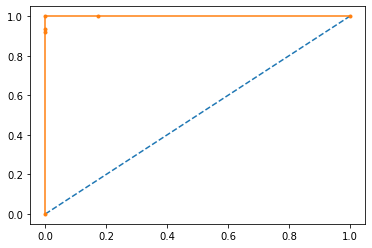

In [54]:
# predict probabilities
probs = best_model_log.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('Training AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Testing AUC: 0.989


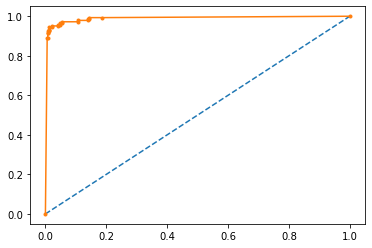

In [55]:
# predict probabilities
probs = best_model_log.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('Testing AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## 1.8 Build a Random Forest Model on Train Dataset. Also showcase your model building approach

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = {
    'max_depth': [10,15],
    'min_samples_leaf': [20,30],
    'min_samples_split': [80,100,120],
    'n_estimators': [140,150,180]}

In [58]:
rfcl = RandomForestClassifier()

In [59]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [60]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15], 'min_samples_leaf': [20, 30],
                         'min_samples_split': [80, 100, 120],
                         'n_estimators': [140, 150, 180]})

In [61]:
grid_search.best_params_

{'max_depth': 15,
 'min_samples_leaf': 20,
 'min_samples_split': 120,
 'n_estimators': 150}

In [62]:
best_grid_rfc = grid_search.best_estimator_

In [63]:
pred_train_rfc = best_grid_rfc.predict(X_train)
pred_test_rfc = best_grid_rfc.predict(X_test)

In [64]:
ytrain_predict_prob_rfc= best_grid_rfc.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_rfc).head()

,0,1
0,0.985276,0.014724
1,0.998853,0.001147
2,0.989380,0.010620
3,0.975464,0.024536
4,1.000000,0.000000


In [65]:
ytest_predict_prob_rfc=best_grid_rfc.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_rfc).head()

,0,1
0,0.998817,0.001183
1,0.999434,0.000566
2,0.963599,0.036401
3,0.089440,0.910560
4,0.978408,0.021592


In [66]:
print(pd.DataFrame(best_grid_rfc.feature_importances_, columns=["IMP"],index = X_train.columns).sort_values('IMP',ascending =False))

                                        IMP
Networth Next Year                 0.266684
Networth                           0.217275
Book Value (Unit Curr)             0.171552
Book Value (Adj.) (Unit Curr)      0.164700
Current Ratio[Latest]              0.022064
...                                     ...
Inventory Ratio[Latest]            0.000002
Inventory Velocity (Days)          0.000001
ROG-Revenue expenses in forex (%)  0.000000
ROG-Revenue earnings in forex (%)  0.000000
Capital expenses in forex          0.000000

[65 rows x 1 columns]


## 1.9 Validate the Random Forest Model on test Dataset and state the performance matrices. Also state interpretation from the model

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2157
         1.0       0.94      0.87      0.91       245

    accuracy                           0.98      2402
   macro avg       0.96      0.93      0.95      2402
weighted avg       0.98      0.98      0.98      2402
 



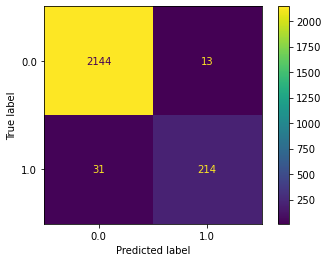

In [67]:
## Confusion matrix on the training data

plot_confusion_matrix(best_grid_rfc,X_train,y_train)
print(classification_report(y_train, pred_train_rfc),'\n');

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1041
         1.0       0.94      0.90      0.92       143

    accuracy                           0.98      1184
   macro avg       0.96      0.95      0.96      1184
weighted avg       0.98      0.98      0.98      1184
 



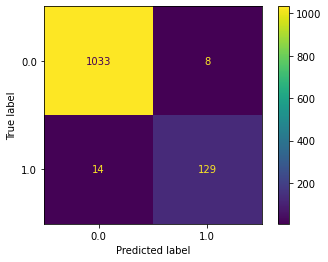

In [68]:
## Confusion matrix on the testing data

plot_confusion_matrix(best_grid_rfc,X_test,y_test)
print(classification_report(y_test, pred_test_rfc),'\n');

Training AUC: 0.999


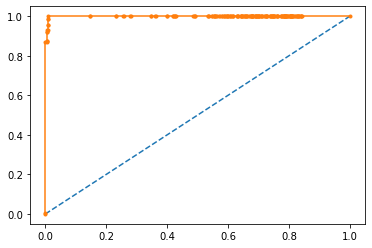

In [69]:
# predict probabilities
probs = best_grid_rfc.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('Training AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Testing AUC: 0.999


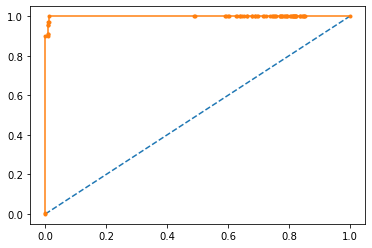

In [70]:
# predict probabilities
probs = best_grid_rfc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('Testing AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## 1.10 Build a LDA Model on Train Dataset. Also showcase your model building approach

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [72]:
LDA = LinearDiscriminantAnalysis()

In [73]:
model_lda = LDA.fit(X_train, y_train)

In [74]:
pred_train_lda = model_lda.predict(X_train)
pred_test_lda = model_lda.predict(X_test)

In [75]:
ytrain_predict_prob_lda= model_lda.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_lda).head()

,0,1
0,0.992390,0.007610
1,0.981468,0.018532
2,0.999641,0.000359
3,0.979348,0.020652
4,0.996049,0.003951


In [76]:
ytest_predict_prob_lda= model_lda.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_lda).head()

,0,1
0,0.994371,0.005629
1,0.964197,0.035803
2,0.917587,0.082413
3,0.826752,0.173248
4,0.998898,0.001102


## 1.11 Validate the LDA Model on test Dataset and state the performance matrices. Also state interpretation from the model

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      2157
         1.0       0.83      0.44      0.57       245

    accuracy                           0.93      2402
   macro avg       0.88      0.71      0.77      2402
weighted avg       0.93      0.93      0.92      2402
 



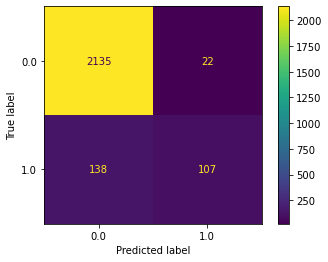

In [77]:
## Confusion matrix on the training data

plot_confusion_matrix(model_lda,X_train,y_train)
print(classification_report(y_train, pred_train_lda),'\n');

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1041
         1.0       0.85      0.38      0.53       143

    accuracy                           0.92      1184
   macro avg       0.88      0.69      0.74      1184
weighted avg       0.91      0.92      0.90      1184
 



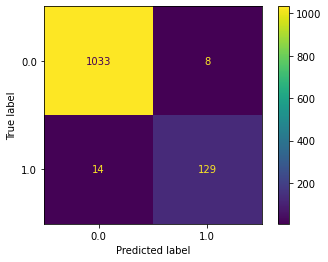

In [78]:
## Confusion matrix on the testing data

plot_confusion_matrix(best_grid_rfc,X_test,y_test)
print(classification_report(y_test, pred_test_lda),'\n');

Training AUC: 0.956


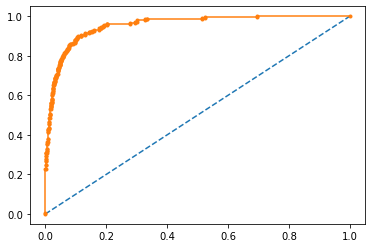

In [79]:
# predict probabilities
probs = model_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('Training AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Testing AUC: 0.943


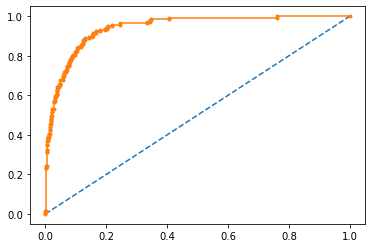

In [80]:
# predict probabilities
probs = model_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('Testing AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [81]:
market = pd.read_csv('Market+Risk+Dataset.csv')

In [82]:
#Glimpse of Data
market.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [83]:
market.columns = market.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '')

In [84]:
market.head()

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [85]:
print('The number of rows (observations) is',market.shape[0],'\n''The number of columns (variables) is',market.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [86]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [87]:
market.shape

(314, 11)

In [88]:
market.describe()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


## 2.1 Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference

In [89]:
market['dates'] = [pd.to_datetime(d) for d in market['Date']]

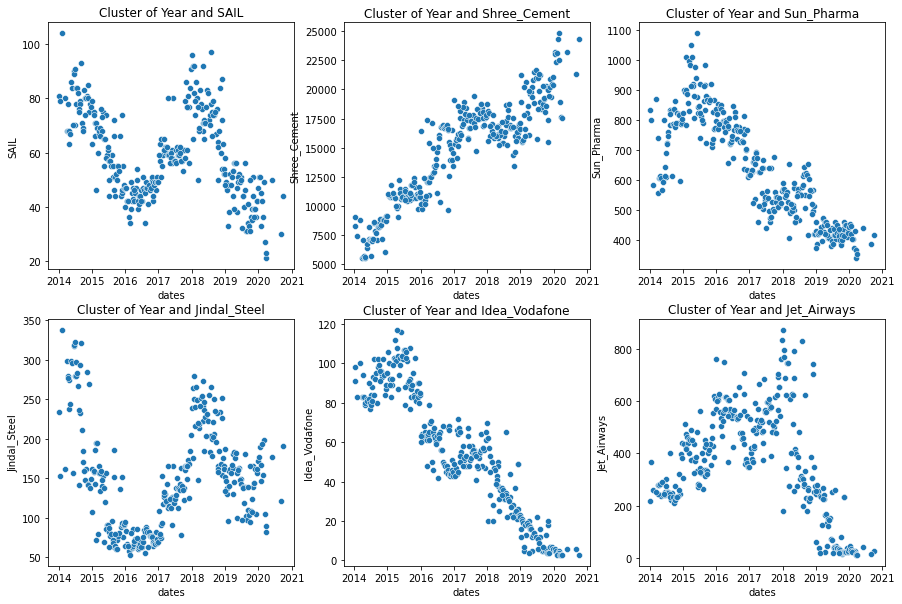

In [90]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.scatterplot(x='dates', y='SAIL', data=market)
plt.title('Cluster of Year and SAIL')

plt.subplot(2,3,2)
sns.scatterplot( x='dates', y='Shree_Cement', data=market)
plt.title('Cluster of Year and Shree_Cement')

plt.subplot(2,3,3)
sns.scatterplot(x='dates', y='Sun_Pharma', data=market)
plt.title('Cluster of Year and Sun_Pharma');

plt.subplot(2,3,4)
sns.scatterplot(x='dates', y='Jindal_Steel', data=market)
plt.title('Cluster of Year and Jindal_Steel');

plt.subplot(2,3,5)
sns.scatterplot(x='dates', y='Idea_Vodafone', data=market)
plt.title('Cluster of Year and Idea_Vodafone');

plt.subplot(2,3,6)
sns.scatterplot(x='dates', y='Jet_Airways', data=market)
plt.title('Cluster of Year and Jet_Airways');

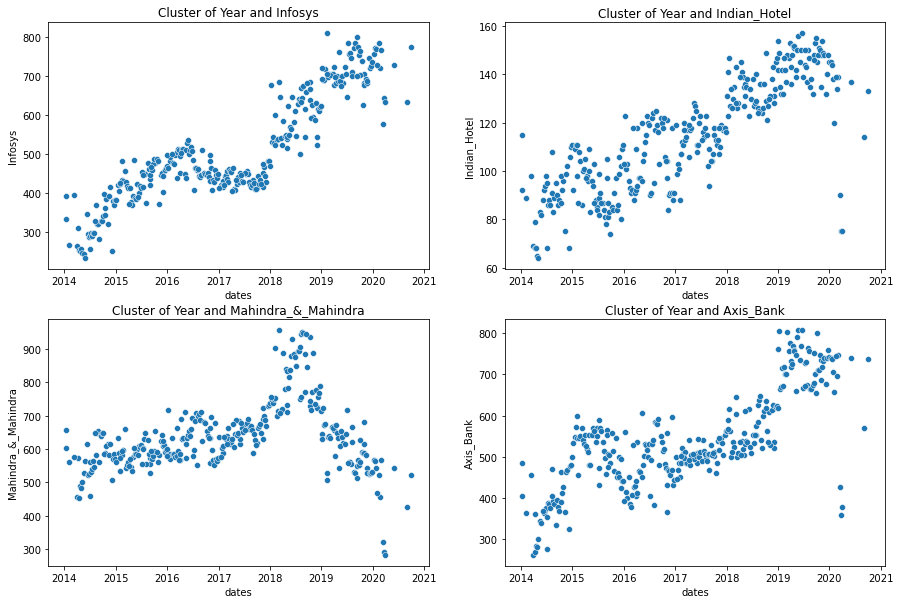

In [91]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.scatterplot(x='dates', y='Infosys', data=market)
plt.title('Cluster of Year and Infosys')

plt.subplot(2,2,2)
sns.scatterplot( x='dates', y='Indian_Hotel', data=market)
plt.title('Cluster of Year and Indian_Hotel')

plt.subplot(2,2,3)
sns.scatterplot(x='dates', y='Mahindra_&_Mahindra', data=market)
plt.title('Cluster of Year and Mahindra_&_Mahindra');

plt.subplot(2,2,4)
sns.scatterplot(x='dates', y='Axis_Bank', data=market)
plt.title('Cluster of Year and Axis_Bank');


## 2.2 Calculate Returns for all stocks with inference

In [92]:
stock_returns = np.log(market.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1)

In [93]:
stock_returns.shape

(314, 10)

In [94]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


## 2.3 Calculate Stock Means and Standard Deviation for all stocks with inference

### Stock Means

In [95]:
stock_means = stock_returns.mean(axis = 0)

In [96]:
stock_means.sort_values(ascending=False)

Shree_Cement           0.003681
Infosys                0.002794
Axis_Bank              0.001167
Indian_Hotel           0.000266
Sun_Pharma            -0.001455
Mahindra_&_Mahindra   -0.001506
SAIL                  -0.003463
Jindal_Steel          -0.004123
Jet_Airways           -0.009548
Idea_Vodafone         -0.010608
dtype: float64

### Stock Standard Deviation

In [97]:
stock_std = stock_returns.std(axis = 0)

In [98]:
stock_std.sort_values(ascending=False)

Idea_Vodafone          0.104315
Jet_Airways            0.097972
Jindal_Steel           0.075108
SAIL                   0.062188
Indian_Hotel           0.047131
Axis_Bank              0.045828
Sun_Pharma             0.045033
Mahindra_&_Mahindra    0.040169
Shree_Cement           0.039917
Infosys                0.035070
dtype: float64

## 2.4 Draw a plot of Stock Means vs Standard Deviation and state your inference

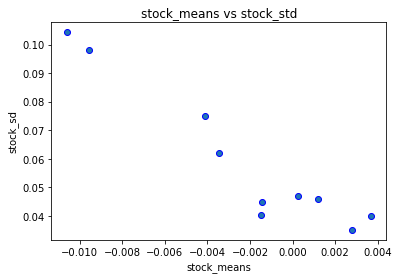

In [99]:
plt.scatter(stock_means, stock_std, edgecolors='b')
plt.xlabel('stock_means')
plt.ylabel('stock_sd')
plt.title('stock_means vs stock_std')
plt.show()